In [24]:
#pip install pandas

In [25]:
#pip install matplotlib

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

## Functions

In [ ]:
def count_all_animals(animals_dict):
    total_count = sum(len(values) for values in animals_dict.values())
    print(total_count)

In [28]:

def check_accuracy(csv_path, animals_dict):

    animals_dict = {key.lower(): [animal.lower() for animal in animals] for key, animals in animals_dict.items()}
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            animal_name = path_parts[-2].strip().lower()  

            # Check if the label and animal name match in the dictionary
            if row['label'] in animals_dict and animal_name in animals_dict[row['label']]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

## Base 80 Animals

In [29]:

def base_accuracy(csv_path):
    animals_list = [
    "Bear", "Brown Bear", "Bull", "Butterfly", "Camel", "Canary", "Caterpillar", 
    "Cattle", "Centipede", "Cheetah", "Chicken", "Crab", "Crocodile", "Deer", 
    "Duck", "Eagle", "Elephant", "Fish", "Fox", "Frog", "Giraffe", "Goat", 
    "Goldfish", "Goose", "Hamster", "Harbor Seal", "Hedgehog", "Hippopotamus", 
    "Horse", "Jaguar", "Jellyfish", "Kangaroo", "Koala", "Ladybug", "Leopard", 
    "Lion", "Lizard", "Lynx", "Magpie", "Monkey", "Moths and butterflies", 
    "Mouse", "Mule", "Ostrich", "Otter", "Owl", "Panda", "Parrot", "Penguin", 
    "Pig", "Polar Bear", "Rabbit", "Raccoon", "Raven", "Red panda", "Rhinoceros", 
    "Scorpion", "Seahorse", "Sea Lion", "Sea Turtle", "Shark", "Sheep", "Shrimp", 
    "Snail", "Snake", "Sparrow", "Spider", "Squid", "Squirrel", "Starfish", 
    "Swan", "Tick", "Tiger", "Tortoise", "Turkey", "Turtle", "Whale", 
    "Woodpecker", "Worm", "Zebra"
]

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            animal_name = path_parts[-2].strip().lower()  

            # Check if the label and animal name match in the dictionary
            if row['label'] == animal_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [30]:
print(base_accuracy('base.csv'))

77.35


## Classification

In [31]:
class_dict = {
    "Mammals": [
        "Bear", "Brown Bear", "Bull", "Camel", "Cattle","Cheetah", "Deer", "Elephant",
        "Fox", "Giraffe", "Goat", "Hamster","Harbor Seal", "Hedgehog", "Hippopotamus",
        "Horse", "Jaguar", "Kangaroo", "Koala", "Leopard", "Lion", "Lynx",
        "Monkey", "Mouse", "Mule", "Otter", "Panda", "Pig", "Polar Bear",
        "Rabbit", "Raccoon", "Red Panda", "Rhinoceros", "Sea Lion", "Sheep","Squirrel", "Tiger",
        "Whale", "Zebra"
    ],

    "Birds": [
        "Canary", "Chicken", "Duck", "Eagle", "Goose", "Magpie", "Ostrich",
        "Owl", "Parrot", "Penguin", "Raven", "Sparrow", "Swan", "Turkey", 
        "Woodpecker"],
        
    "Reptiles": [
        "Crocodile", "Lizard", "Sea Turtle", "Snake", "Tortoise", "Turtle"],

    "Amphibians": ["Frog"],

    "Fish": ["Fish", "Goldfish", "Seahorse", "Shark"],

    "Invertebrates": [
        "Butterfly", "Caterpillar", "Centipede", "Jellyfish", "Ladybug", "Moths and Butterflies", 
        "Tick", "Crab", "Scorpion", "Shrimp", "Snail", "Spider", "Squid", 
        "Starfish", "Worm"
    ]
}
print(check_accuracy('classification.csv', class_dict))

86.82


## Aquatic or Not

In [32]:
aquatic_dict = {
    "Not Aquatic Animal" : ["Bear", "Brown Bear", "Bull", "Butterfly", "Camel", "Canary", "Caterpillar", 
    "Cattle", "Centipede", "Cheetah", "Chicken", "Deer", 
     "Eagle", "Elephant",  "Fox",  "Giraffe", "Goat", 
     "Goose", "Hamster",  "Hedgehog", 
    "Horse", "Jaguar",  "Kangaroo", "Koala", "Ladybug", "Leopard", 
    "Lion", "Lizard", "Lynx", "Magpie", "Monkey", "Moths and butterflies", 
    "Mouse", "Mule", "Ostrich", "Owl", "Panda", "Parrot", 
    "Pig",  "Rabbit", "Raccoon", "Raven", "Red panda", "Rhinoceros", 
    "Scorpion", "Sheep", 
    "Snail", "Snake", "Sparrow", "Spider", "Squirrel", 
     "Tick", "Tiger", "Tortoise", "Turkey", 
    "Woodpecker", "Worm", "Zebra"],

    "Aquatic Animal" : ["Crab", "Crocodile","Duck","Fish","Goldfish","Frog","Harbor Seal",
                     "Hippopotamus", "Jellyfish", "Otter", "Penguin", "Polar Bear",
                      "Seahorse", "Sea Lion", "Sea Turtle", "Shark", "Shrimp", "Squid",
                        "Starfish", "Swan", "Turtle", "Whale"]
}
print(check_accuracy('aquatic.csv', aquatic_dict))

76.97


## Diet

In [33]:
diet_dict = {
    "Carnivore": [
        "Bear", "Brown Bear", "Bull", "Centipede", "Cheetah", "Crab", "Crocodile", "Eagle", "Fox", 
        "Harbor Seal", "Jaguar", "Jellyfish", "Leopard", "Lion", "Lizard", "Lynx", "Magpie", 
        "Otter", "Penguin", "Polar Bear", "Scorpion", "Shark", "Snake", "Spider", "Whale"
    ],
    
    "Herbivore": [
        "Butterfly", "Camel", "Canary", "Caterpillar", "Cattle", "Deer", "Duck", 
        "Elephant", "Giraffe", "Goat", "Goldfish", "Goose", "Horse", "Kangaroo", 
        "Koala", "Ladybug", "Moths and butterflies", "Mule", "Ostrich", "Panda", "Rabbit", "Rhinoceros", 
        "Seahorse", "Sheep", "Snail", "Sparrow", "Squirrel", "Starfish", "Swan", 
        "Tortoise", "Turtle", "Zebra"
    ],

    "Omnivore": [
        "Bear", "Brown Bear", "Chicken", "Duck", "Fish", "Frog", "Hamster", "Hedgehog", 
        "Monkey", "Mouse", "Parrot", "Pig", "Raccoon", "Raven", "Red panda", "Sea Lion", 
        "Sea Turtle", "Shrimp", "Squirrel", "Turkey", "Whale", "Worm"
    ],

    "Other Diet": ["Tick"]
}

print(check_accuracy('diet.csv', diet_dict))

36.21


## Fish, Bird, Other

In [34]:
birdFish_dict = {"Fish" : ["Fish", "Goldfish", "Seahorse", "Shark"],
                
                "Bird" :  [
        "Canary", "Chicken", "Duck", "Eagle", "Goose", "Magpie", "Ostrich",
        "Owl", "Parrot", "Penguin", "Raven", "Sparrow", "Swan", "Turkey", 
        "Woodpecker"],
        
                "Other Animal" : [
        "Bear", "Brown Bear", "Bull", "Camel", "Cattle","Cheetah", "Deer", "Elephant",
        "Fox", "Giraffe", "Goat", "Hamster","Harbor Seal", "Hedgehog", "Hippopotamus",
        "Horse", "Jaguar", "Kangaroo", "Koala", "Leopard", "Lion", "Lynx",
        "Monkey", "Mouse", "Mule", "Otter", "Panda", "Pig", "Polar Bear",
        "Rabbit", "Raccoon", "Red Panda", "Rhinoceros", "Sea Lion", "Sheep","Squirrel", "Tiger",
        "Whale", "Zebra","Crocodile", "Lizard", "Sea Turtle", "Snake", "Tortoise", "Turtle",
        "Butterfly", "Caterpillar", "Centipede", "Jellyfish", "Ladybug", "Moths and Butterflies", 
        "Tick", "Crab", "Scorpion", "Shrimp", "Snail", "Spider", "Squid", 
        "Starfish", "Worm", "Frog"]}

# count_all_animals(animals_dict)


print(check_accuracy('birdFish.csv', birdFish_dict))


89.22


## Legs or no Legs

In [35]:
legs_dict = {
    "Animals with Four Legs": [
        "Bear", "Brown Bear", "Bull", "Camel", "Cattle", "Cheetah", "Deer", "Elephant",
        "Fox", "Giraffe", "Goat", "Hamster", "Harbor Seal", "Hedgehog", "Hippopotamus",
        "Horse", "Jaguar", "Kangaroo", "Koala", "Leopard", "Lion", "Lynx", "Monkey", 
        "Mouse", "Mule", "Otter", "Panda", "Pig", "Polar Bear", "Rabbit", "Raccoon", 
        "Red Panda", "Rhinoceros", "Sea Lion", "Sheep", "Squirrel", "Tiger", "Zebra", 
        "Dog", "Cat", "Toroise", "Turtle", "Sea Turtle", "Frog"
    ],
    
    "Animals with Two Legs": [
        "Canary", "Chicken", "Duck", "Eagle", "Goose", "Magpie", "Ostrich",
        "Owl", "Parrot", "Penguin", "Raven", "Sparrow", "Swan", "Turkey", "Human"
    ],
    
    "Animals with Other Amount of Legs": [
        "Caterpillar", "Centipede", "Crab", "Scorpion", "Shrimp", "Spider", "Squid", "Starfish",
        "Octopus", "Jellyfish", "Ladybug"
    ],
    
    "Animals with no Legs": [
        "Snake",  "Fish", "Goldfish", "Seahorse", "Shark", 
        "Worm", "Butterfly", "Moths and Butterflies", "Tick", "Snail"
    ]
}

#count_all_animals(legs_dict)
print(check_accuracy('legs.csv', legs_dict))

35.35


## Mobility

In [36]:
mobility_dict = {
    "Animals that Fly": [
        "Butterfly", "Canary", "Eagle", "Goose", "Magpie", "Moths and butterflies", 
        "Ostrich", "Owl", "Parrot", "Penguin", "Raven", "Sparrow", "Swan", 
        "Turkey", "Woodpecker"
    ],
    "Water-dwelling Animals": [
        "Crab", "Crocodile", "Duck", "Fish", "Frog", "Goldfish", "Harbor Seal", 
        "Jellyfish", "Otter", "Seahorse", "Sea Lion", "Sea Turtle", "Shark", 
        "Shrimp", "Squid", "Starfish", "Turtle", "Whale"
    ],
    "Animals that Walk or Run": [
        "Bear", "Brown Bear", "Bull", "Camel", "Cat","Cattle", "Cheetah", "Deer", 
        "Elephant", "Fox", "Giraffe", "Goat", "Hamster", "Hedgehog", "Hippopotamus", 
        "Horse", "Jaguar", "Kangaroo", "Leopard", "Lion", "Lynx", "Mule", "Panda", 
        "Pig", "Polar Bear", "Rabbit", "Raccoon", "Red panda", "Rhinoceros", "Sheep", 
        "Snake", "Tiger", "Tortoise", "Whale", "Zebra"
    ],
    "Animals that Climb": [
        "Caterpillar", "Centipede", "Koala", "Ladybug", "Lizard", "Monkey", "Mouse", 
        "Scorpion", "Spider", "Squirrel", "Tick", "Worm"
    ]
}


#count_all_animals(mobility_dict)
print(check_accuracy('mobility.csv', mobility_dict))

52.44


## Domestic vs Wild

In [37]:
domestic_dict = {
    "Domestic Animals": [
        "Bull", "Camel", "Canary", "Chicken", "Cattle", "Duck", "Fish", "Goat",
        "Goldfish", "Goose", "Hamster", "Horse", "Mule", "Pig", "Rabbit", "Sheep",
        "Turkey", "Dog", "Cat"
    ],
    "Wild Animals": [
        "Bear", "Brown Bear", "Butterfly", "Caterpillar", "Centipede", "Cheetah",
        "Crab", "Crocodile", "Deer", "Eagle", "Elephant", "Fox", "Frog", "Giraffe",
        "Hedgehog", "Hippopotamus", "Jaguar", "Jellyfish", "Kangaroo", "Koala",
        "Ladybug", "Leopard", "Lion", "Lizard", "Lynx", "Magpie", "Monkey", 
        "Moths and butterflies", "Mouse", "Ostrich", "Otter", "Owl", "Panda", 
        "Parrot", "Penguin", "Polar Bear", "Raccoon", "Raven", "Red panda",
        "Rhinoceros", "Scorpion", "Seahorse", "Sea Lion", "Sea Turtle", "Shark", 
        "Shrimp", "Snail", "Snake", "Sparrow", "Spider", "Squid", "Squirrel", 
        "Starfish", "Swan", "Tick", "Tiger", "Tortoise", "Turtle", "Whale", 
        "Woodpecker", "Worm", "Zebra"
    ]
}

#count_all_animals(domestic_dict)
print(check_accuracy('domestic.csv', domestic_dict))

72.81


## Size

In [38]:
size_dict = {
    "Large Animals": [
        "Bear", "Brown Bear", "Bull", "Camel", "Cattle", "Cheetah", "Crocodile", 
        "Deer", "Elephant", "Giraffe", "Hippopotamus", "Horse", "Jaguar", 
        "Kangaroo", "Leopard", "Lion", "Ostrich", "Polar Bear", "Rhinoceros", 
        "Sea Lion", "Shark", "Tiger", "Whale", "Zebra"
    ],
    "Tiny Animals": [
        "Butterfly", "Caterpillar", "Centipede", "Ladybug", "Moths and butterflies", 
        "Snail", "Spider", "Tick", "Scorpion"
    ],
    "Small Animals": [
        "Canary", "Chicken", "Crab", "Duck", "Eagle", "Fish", "Fox", "Frog", "Goat", 
        "Goldfish", "Goose", "Hamster", "Harbor Seal", "Hedgehog", "Koala", "Lizard", 
        "Lynx", "Magpie", "Monkey", "Mouse", "Mule", "Otter", "Owl", "Panda", "Parrot", 
        "Penguin", "Pig", "Rabbit", "Raccoon", "Raven", "Red panda", "Seahorse", 
        "Sea Turtle", "Sheep", "Shrimp", "Sparrow", "Squid", "Squirrel", "Starfish", 
        "Swan", "Tortoise", "Turkey", "Turtle", "Woodpecker", "Worm", "Jellyfish", "Snake"
    ]
}

#count_all_animals(size_dict)

print(check_accuracy('size.csv', size_dict))

55.83


In [39]:
size_dict2 = {
    "Large Animals": [
        "Bear", "Brown Bear", "Bull", "Camel", "Cattle", "Cheetah", "Crocodile", 
        "Deer", "Elephant", "Giraffe", "Hippopotamus", "Horse", "Jaguar", 
        "Kangaroo", "Leopard", "Lion", "Ostrich", "Polar Bear", "Rhinoceros", 
        "Sea Lion", "Shark", "Tiger", "Whale", "Zebra"
    ],
    "Tiny Animals": [
        "Butterfly", "Caterpillar", "Centipede", "Ladybug", "Moths and butterflies", 
        "Snail", "Spider", "Tick", "Scorpion"
    ],
    "Medium Sized Animals": [
        "Canary", "Chicken", "Crab", "Duck", "Eagle", "Fish", "Fox", "Frog", "Goat", 
        "Goldfish", "Goose", "Hamster", "Harbor Seal", "Hedgehog", "Koala", "Lizard", 
        "Lynx", "Magpie", "Monkey", "Mouse", "Mule", "Otter", "Owl", "Panda", "Parrot", 
        "Penguin", "Pig", "Rabbit", "Raccoon", "Raven", "Red panda", "Seahorse", 
        "Sea Turtle", "Sheep", "Shrimp", "Sparrow", "Squid", "Squirrel", "Starfish", 
        "Swan", "Tortoise", "Turkey", "Turtle", "Woodpecker", "Worm", "Jellyfish", "Snake"
    ]
}

#count_all_animals(size_dict)

print(check_accuracy('size2.csv', size_dict))

24.69


# Graphing

In [40]:
category_counts = {
    2: [check_accuracy('aquatic.csv', aquatic_dict), check_accuracy('domestic.csv', domestic_dict)],
    4: [check_accuracy('diet.csv', diet_dict), check_accuracy('mobility.csv', mobility_dict),
        check_accuracy('legs.csv', legs_dict)],
    6: check_accuracy('classification.csv', class_dict),
    80:base_accuracy('base.csv'),
    3: [check_accuracy('birdFish.csv', 
        birdFish_dict),check_accuracy('size2.csv', size_dict2),
        check_accuracy('size.csv', size_dict)]
}

amount_categories = []
accuracies = []

In [41]:
#Calculate accuracy for each category count
for count, accuracy in category_counts.items():

        if isinstance(accuracy, list):
                for each in accuracy:
                    amount_categories.append(count)
                    accuracies.append(each)
        else:
                amount_categories.append(count)
                accuracies.append(accuracy)
        

In [42]:
print(len(amount_categories), len(accuracies))

10 10


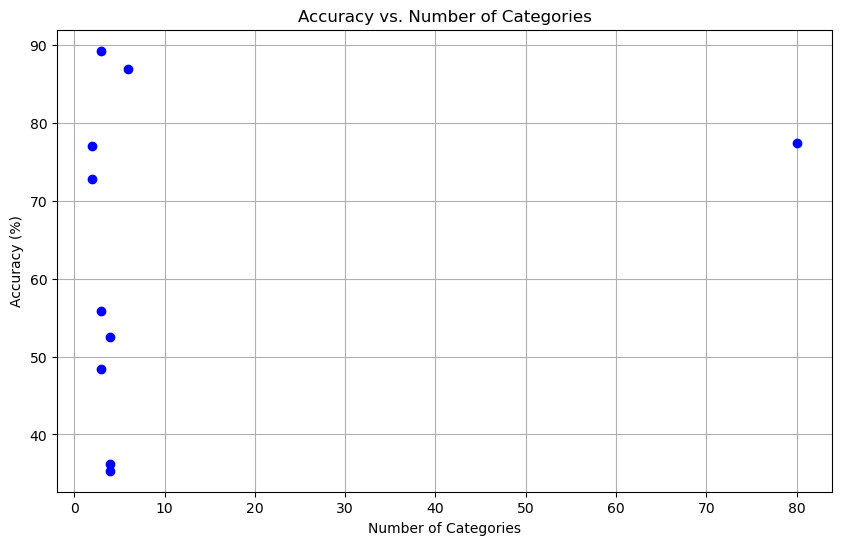

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(amount_categories, accuracies, marker='o', linestyle='None', color='blue')
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.show()